## 1. Download Dataset

In [1]:
!pip install timm
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=de01c0f7d661eae59a393e324222bed865de0e9e2b77f3d3bd79c5d6b1fb283a
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [2]:
#only in google colab
!git clone https://github.com/Giordano-Cicchetti/MaskTune_NN/
!cp MaskTune_NN/CIFAR10/* /content -r
!rm MaskTune_NN/ -r

Cloning into 'MaskTune_NN'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 177 (delta 81), reused 106 (delta 44), pack-reused 0
Receiving objects: 100% (177/177), 8.10 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (81/81), done.


MOUNT DRIVE WITH DATASET FOLDER

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!mkdir data
!cp drive/MyDrive/celeba/ data/celeba -r

In [10]:
!mkdir checkpoints -p
!cp drive/MyDrive/NN_Project_GiorJac/* /content/checkpoints/ -r 

#2. TRAIN MODEL


In [1]:
import torch
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

c:\Users\Giordano\Anaconda3\envs\MACHINELEARNING\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cuda')

In [2]:
from train import *
train=Cifar10Train(device=device)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>

In [ ]:
train.train_erm()

In [4]:
train.test(train.test_loader,"checkpoints/best_erm_model.pt")

----------testing the model----------


Test epoch 19: 100%|██████████| 156/156 [01:14<00:00,  2.10it/s, loss=0.147]


accuracy of group 1: 0.9626292617999386
accuracy of group 2: 0.75
accuracy of group 3: 0.9957531519575316
accuracy of group 4: 0.20555555555555555
average accuracy: 0.9418895902214207
----------Test accuracy =0.20555555555555555----------


In [15]:
!rm -r data/masked/

In [5]:
train.mask_data(train.train_loader,"checkpoints/best_erm_model.pt")

100%|██████████| 1272/1272 [26:35<00:00,  1.25s/it]


---------- indexing Masked data ----------


100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


In [6]:
def finetune(best_resume_checkpoint_path: str=None, last_resume_checkpoint_path: str=None) -> None:
  
  if(best_resume_checkpoint_path!=None and last_resume_checkpoint_path!=None):
    train.mask_data(train.train_loader,best_resume_checkpoint_path)
    checkpoint = torch.load(last_resume_checkpoint_path)
    train.model.load_state_dict(checkpoint['model_state_dict'])
    train.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    resume_epoch = checkpoint['epoch'] + 1


    train.run_an_epoch(data_loader=train.masked_loader,epoch=resume_epoch,mode="train",device=train.device)
    val_accuracy = train.run_an_epoch(
        data_loader=train.val_loader, epoch=resume_epoch, mode="validation",device=train.device
    )
    torch.save({
                'epoch': resume_epoch,
                'model_state_dict': train.model.state_dict(),
                'optimizer_state_dict': train.optimizer.state_dict(),
                'accuracy' : val_accuracy,
                }, "checkpoints/masked_erm_model.pt")
    

finetune(best_resume_checkpoint_path="checkpoints/best_erm_model.pt",last_resume_checkpoint_path="checkpoints/last_erm_model.pt")

---------- indexing Masked data ----------


validation epoch 20: 100%|██████████| 156/156 [01:32<00:00,  1.69it/s, loss=0.183, accuracy=0.929]


In [7]:
train.test(train.test_loader,"checkpoints/masked_erm_model.pt")

----------testing the model----------


Test epoch 20: 100%|██████████| 156/156 [01:18<00:00,  1.99it/s, loss=0.16]

accuracy of group 1: 0.9335517559127675
accuracy of group 2: 0.8491935483870968
accuracy of group 3: 0.9921698739216988
accuracy of group 4: 0.2777777777777778
average accuracy: 0.9392846408175534
----------Test accuracy =0.2777777777777778----------


In [ ]:
for batch in train.masked_loader:
  x=batch[0][0]
  break


In [1]:
!rm -r data/masked/

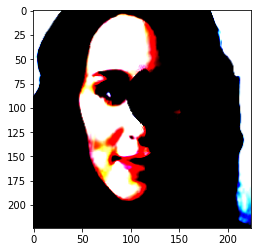

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.transpose(0,1).transpose(1,2))